### imports

In [1]:

from Energy import OUTPUT_DIR, set_debug, debug, switch_debug, get_debug
from Energy.my_energy_reports import create_energy_reports
from Energy.subProjection.my_projection import create_monthly_projection
from Energy.subGraphs.my_plots import swarmplot
from Energy.subTools.projection_tools import projection_in_graph

### setings

In [2]:
set_debug(False)

False

### create energy obiect

In [3]:
energy_object, _ = create_energy_reports(
    refresh = False,
    export_back = 0.8,
    kWh_cost = 0.65,
)

### easy use

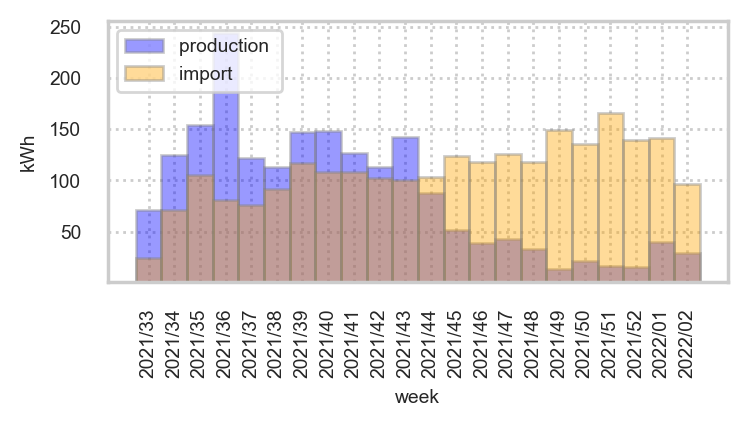

In [13]:
energy_object.basic_barplot(
    group_by="week", columns=['production_', 'import_'],
    agg='sum', 
    figsize=(4,2)
)

In [14]:
energy_object.basic_lineplot(
    group_by="month", columns=['production_', 'import_'],
    agg='sum', fill=["production_"], 
    figsize=(4,2)
)

TypeError: basic_lineplot() got an unexpected keyword argument 'figsize'

No handles with labels found to put in legend.


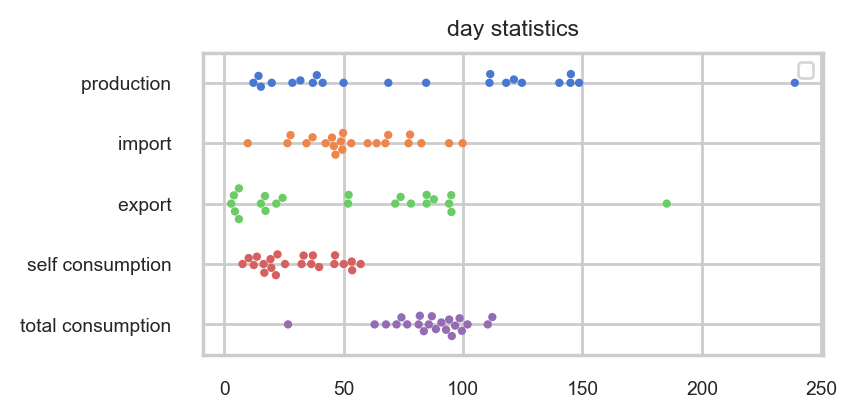

In [11]:
day_hours = [8,9,10,11,12,13,14,15,16,17,18,19]
swarmplot(
    energy_object.get_energy[energy_object.get_energy['hour'].isin(day_hours)],
    filename='',
    agg='sum',
    group_by="week",
    series_to_plot=['production_', 'import_', 'export_', 'self_consumption_', 'total_consumption_'],
    dotsize=3, 
    title="day statistics", 
    figsize=(4,2)
)

C:\Users\PiotrKalista\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\PiotrKalista\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\PiotrKalista\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 40.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


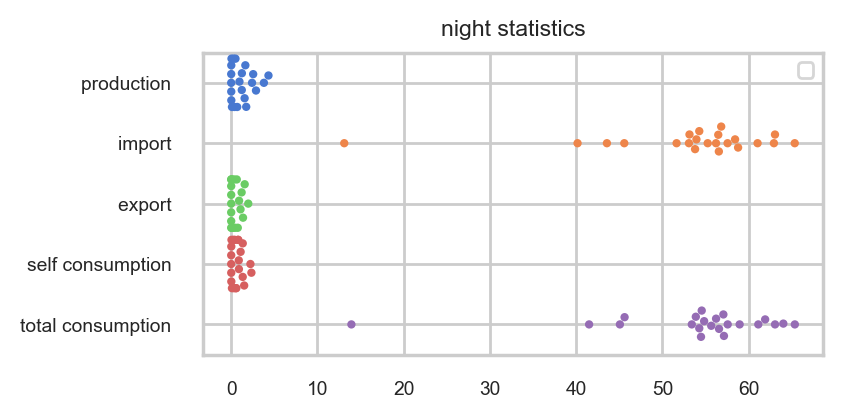

In [12]:
swarmplot(
    energy_object.get_energy[~energy_object.get_energy['hour'].isin(day_hours)],
    filename='',
    agg='sum',
    group_by="week",
    series_to_plot=['production_', 'import_', 'export_', 'self_consumption_', 'total_consumption_'],
    dotsize=3, 
    title="night statistics", 
    figsize=(4,2)
)

## Show projection

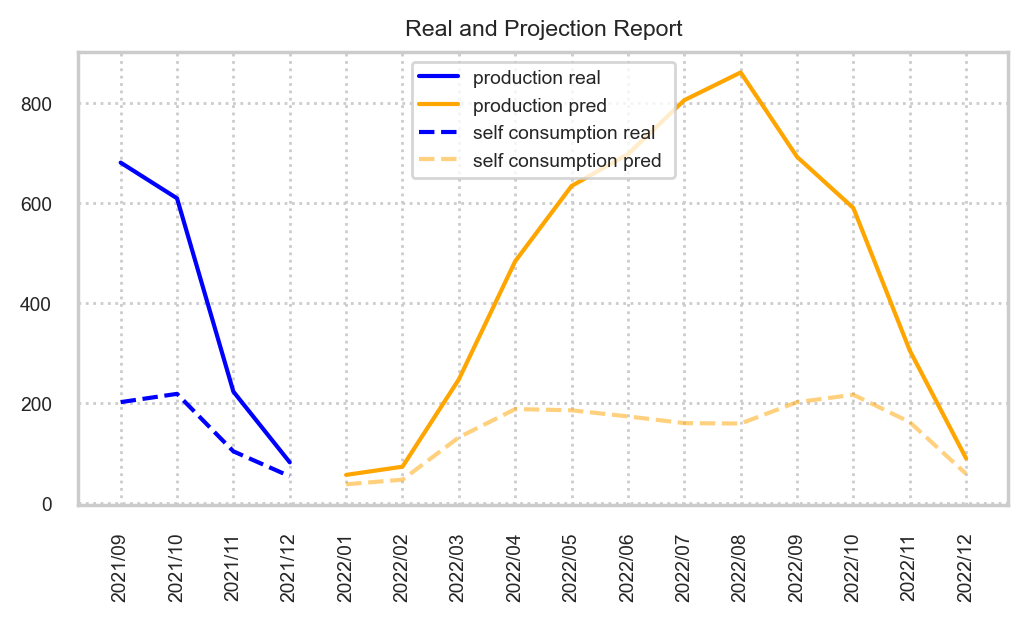

In [8]:
energy_df, projection_df = create_monthly_projection(energy_object, 12)

In [9]:
projection_df

,month,month_str,%sun,%midsun,%cloud,avg_temp,suntime_minutes,production_,self_consumption_
0,1,2022/01,0.116129,0.335484,0.548387,2,518.451613,55.725653,36.992655
1,2,2022/02,0.113475,0.354610,0.531915,3,608.068966,72.148536,46.150041
2,3,2022/03,0.141935,0.435484,0.422581,8,714.806452,246.684527,130.879512
3,4,2022/04,0.190000,0.496667,0.313333,15,828.066667,482.889031,187.328018
4,5,2022/05,0.212903,0.525806,0.261290,20,926.451613,633.333807,184.909969
5,6,2022/06,0.160000,0.600000,0.240000,23,978.066667,696.845819,172.648085
6,7,2022/07,0.248387,0.548387,0.203226,25,952.451613,804.850322,159.224160
7,8,2022/08,0.274194,0.525806,0.200000,26,865.612903,860.289548,158.429006
8,9,2022/09,0.250000,0.450000,0.300000,21,756.700000,691.578912,201.125327
9,10,2022/10,0.296774,0.400000,0.303226,16,644.387097,589.209199,215.962116
